<a href="https://colab.research.google.com/github/akashgundu/EDA_21BDS0279_DA-1-/blob/main/EDA_DA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Loaded Successfully!

Dataset Dimensions: (322, 20)

Dataset Columns: ['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division', 'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague']

First Few Rows:
    AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
0    293    66      1    30   29     14      1     293     66       1     30   
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   
3    496   141     20    65   78     37     11    5628   1575     225    828   
4    321    87     10    39   42     30      2     396    101      12     48   

   CRBI  CWalks League Division  PutOuts  Assists  Errors  Salary NewLeague  
0    29      14      A        E      446       33      20     NaN         A  
1   414     375      N        W      632       43      10   475.0         

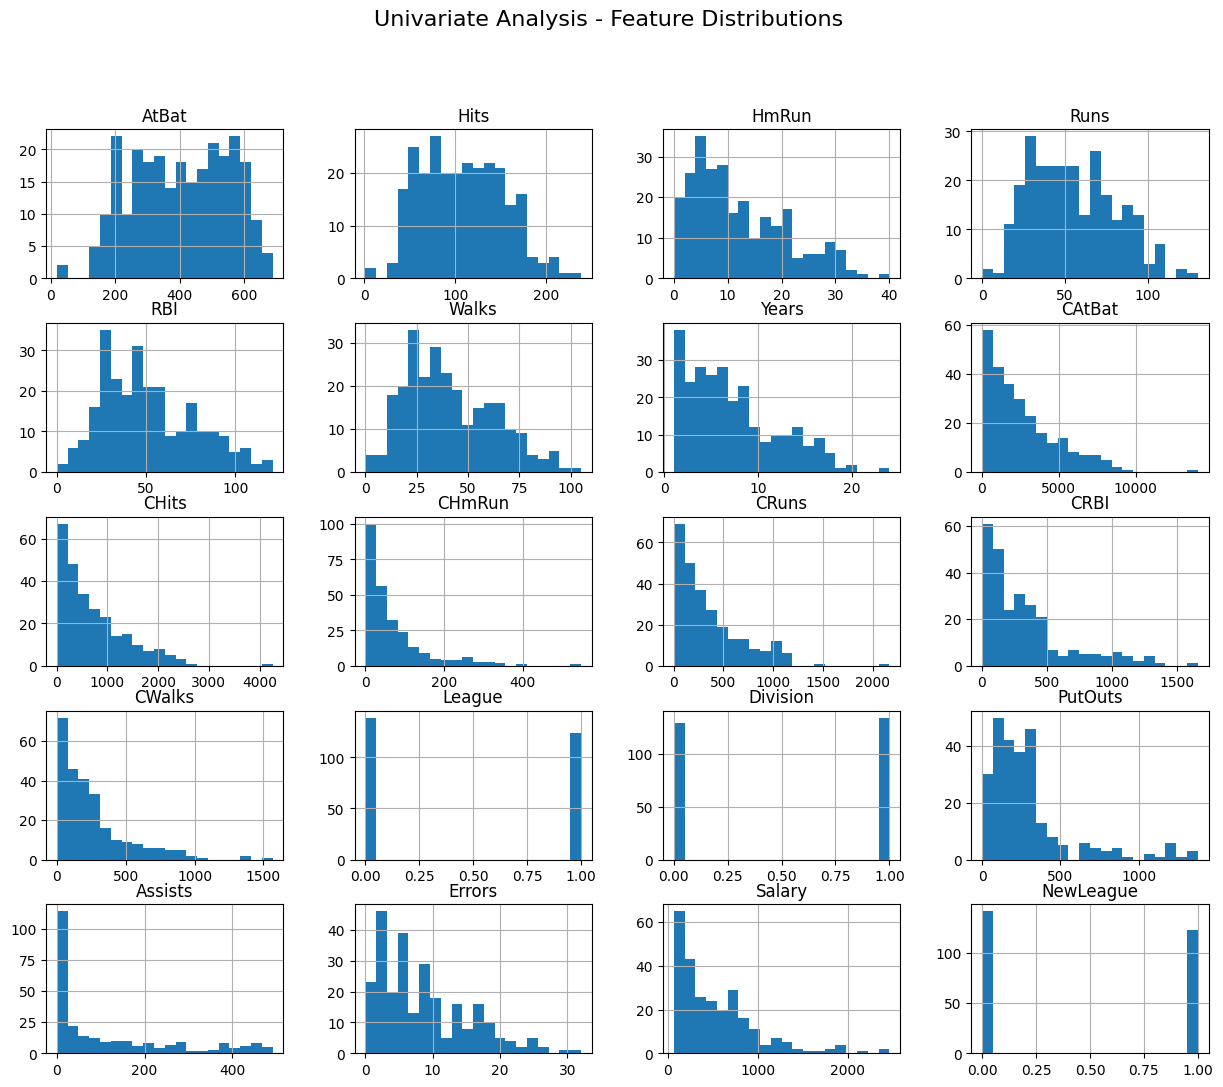

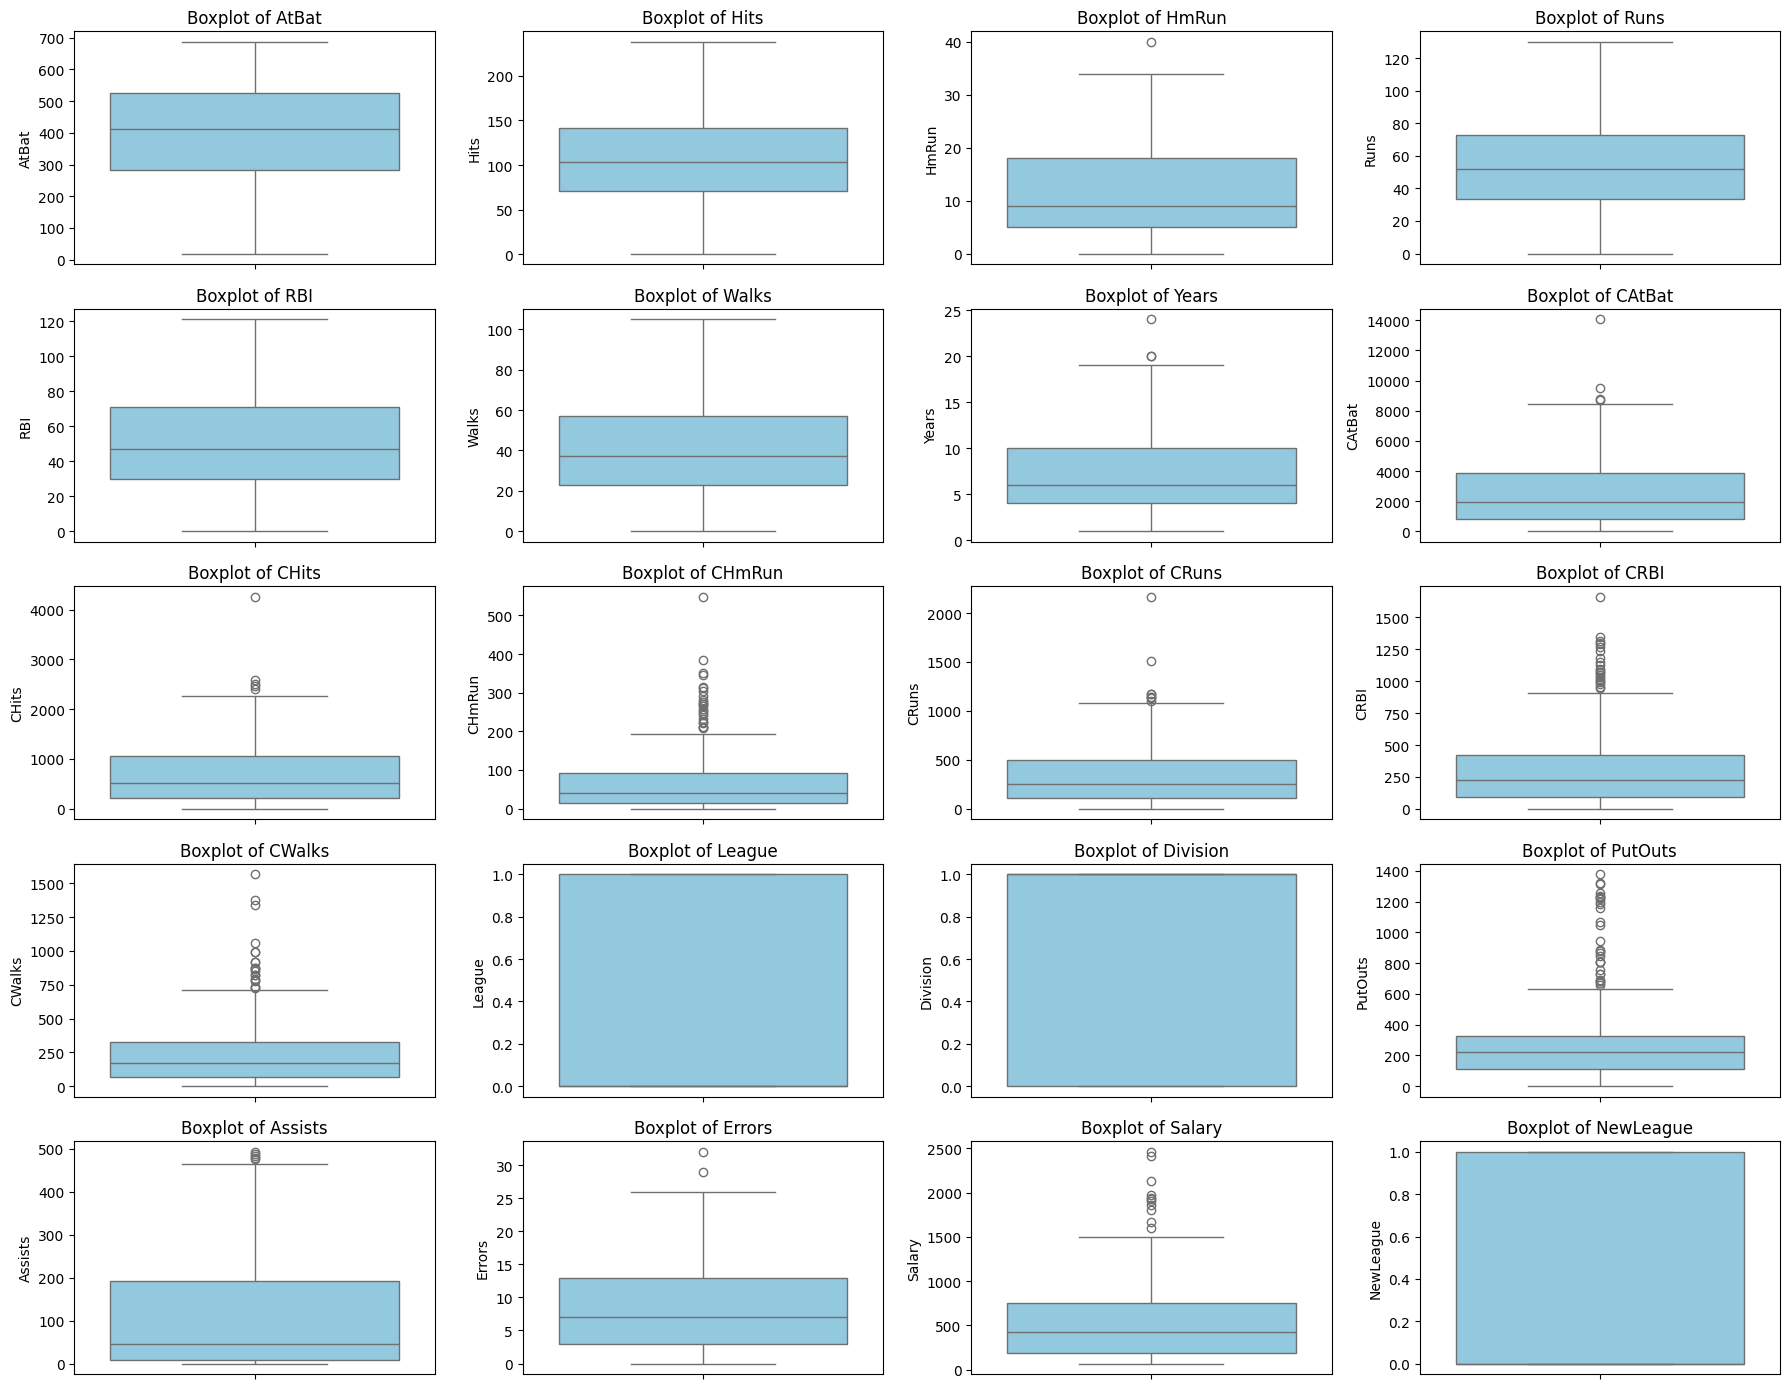

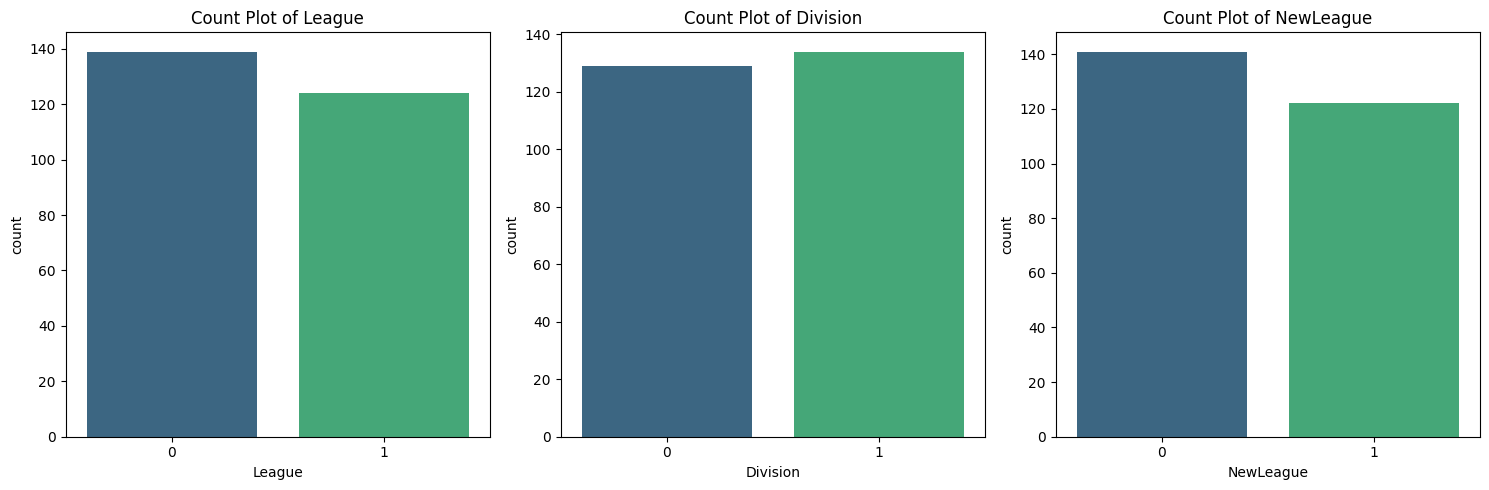

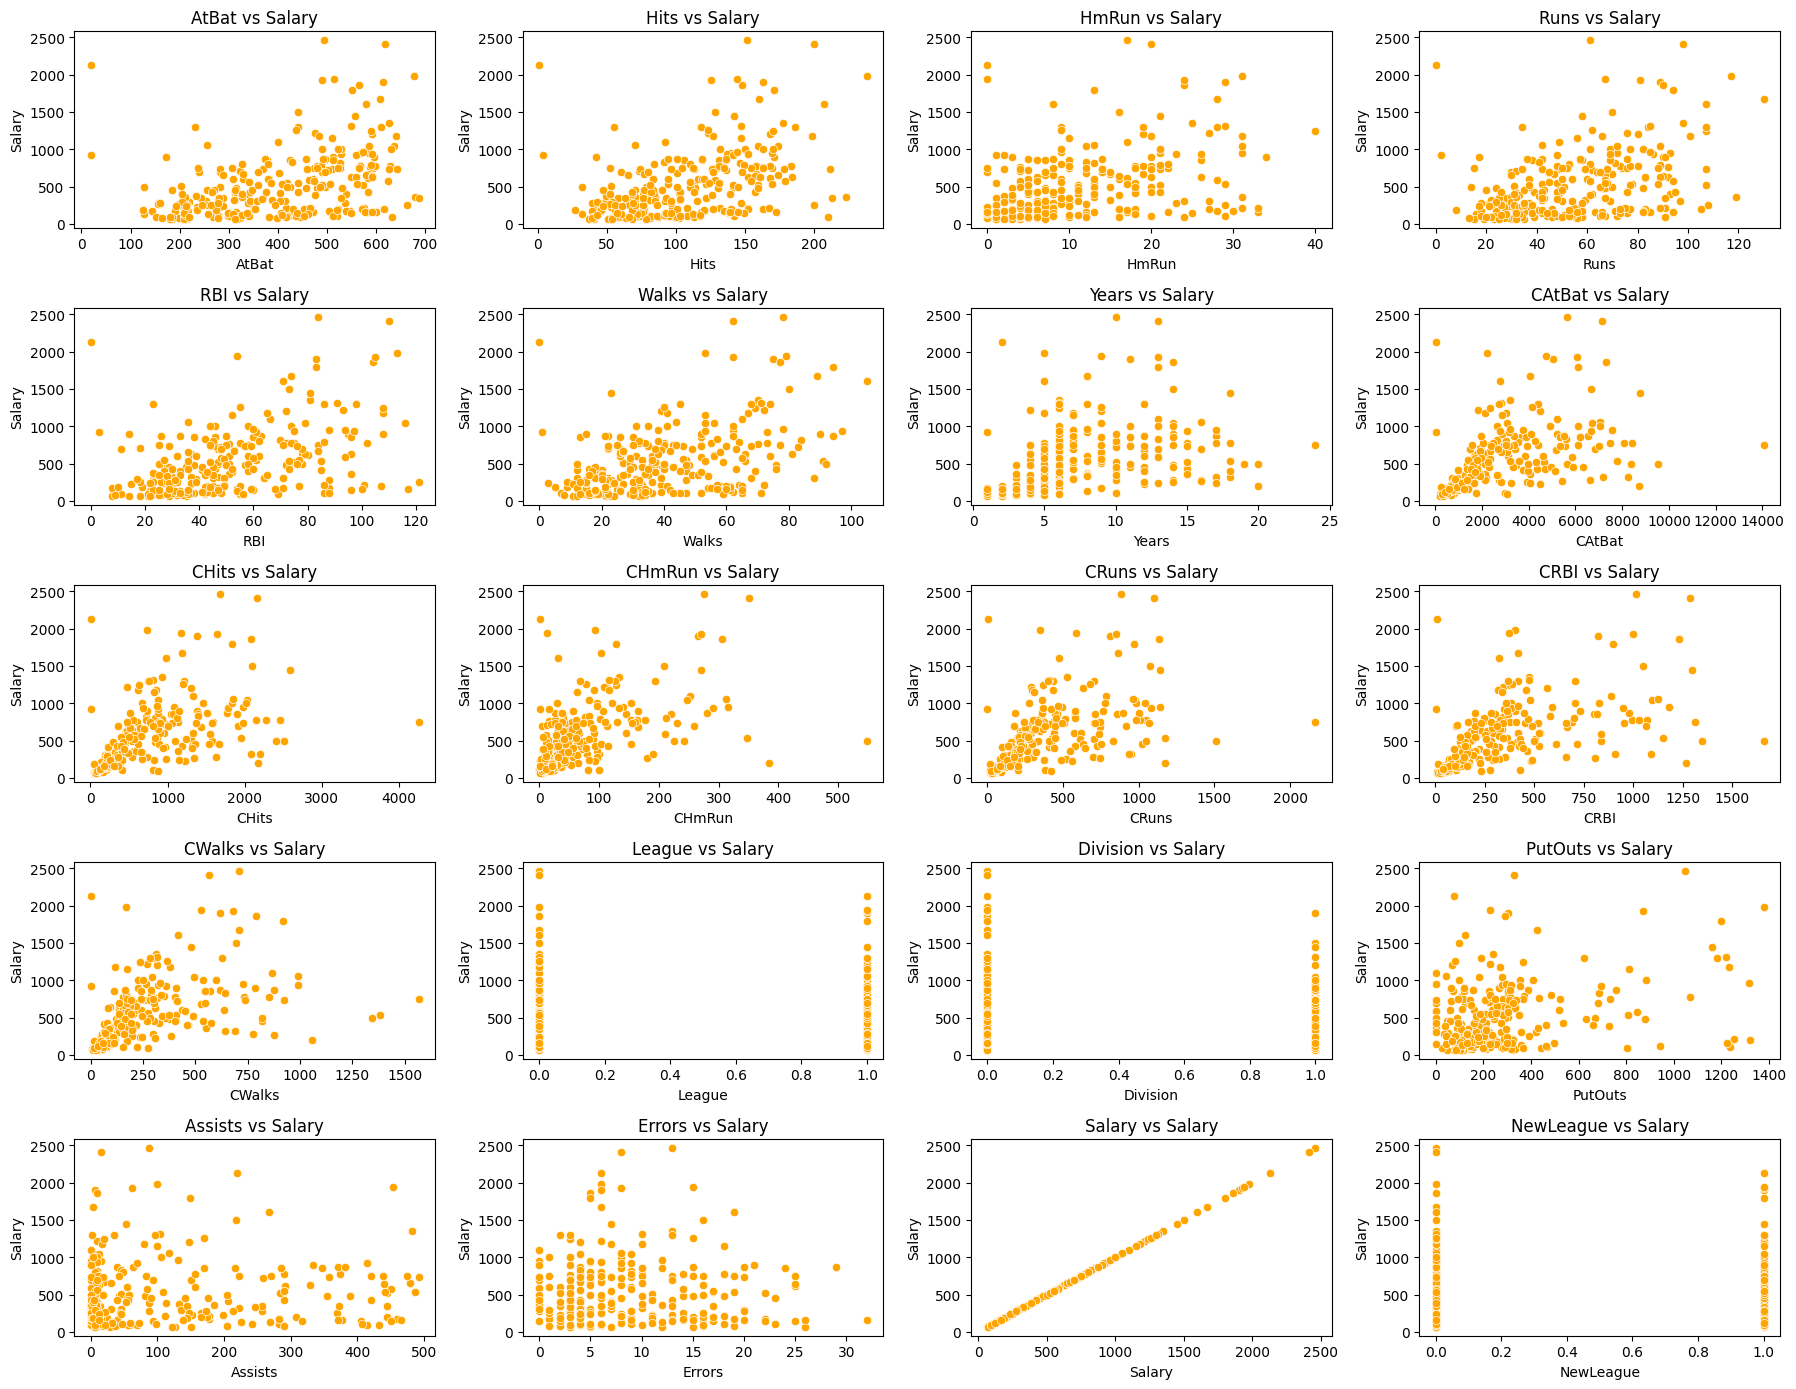

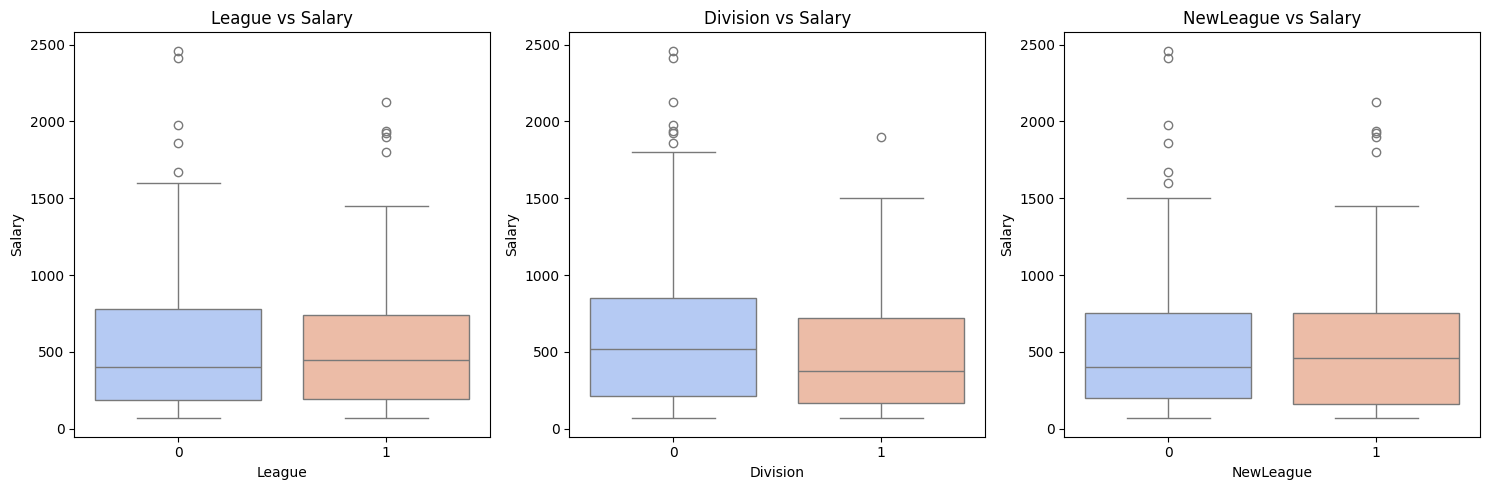

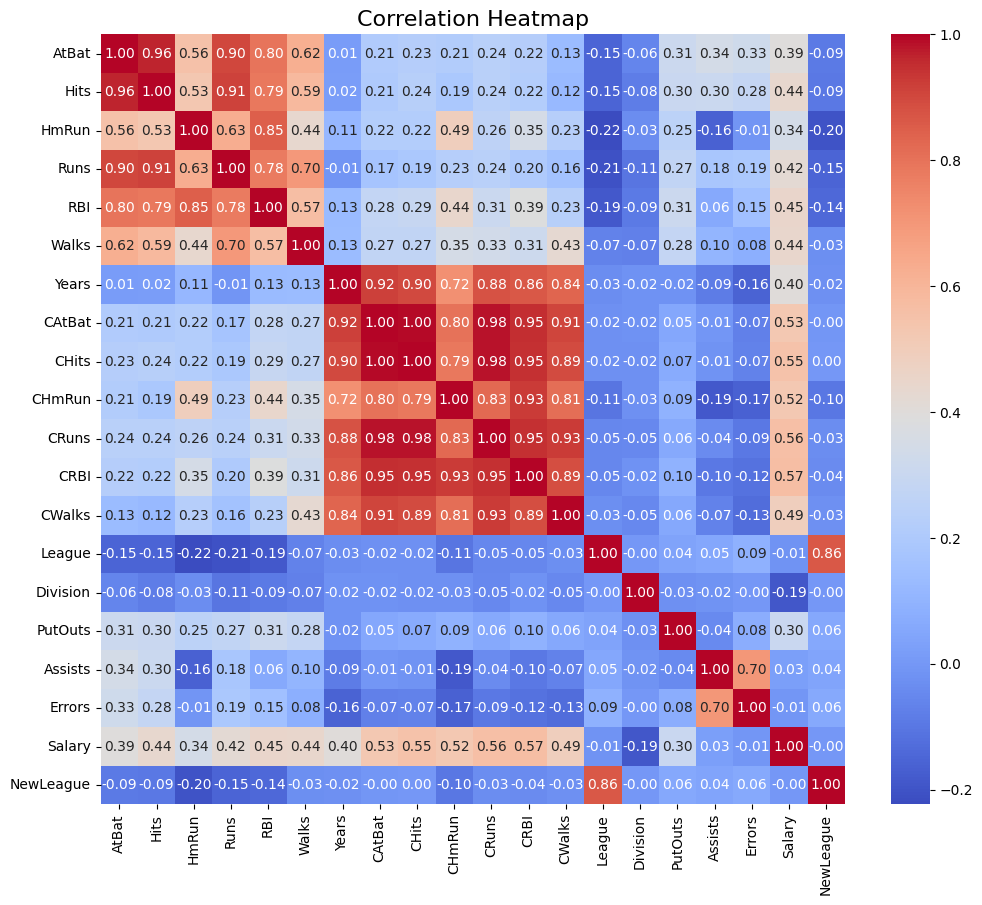


Pearson Correlation with Salary:
AtBat: 0.39
Hits: 0.44
HmRun: 0.34
Runs: 0.42
RBI: 0.45
Walks: 0.44
Years: 0.40
CAtBat: 0.53
CHits: 0.55
CHmRun: 0.52
CRuns: 0.56
CRBI: 0.57
CWalks: 0.49
League: -0.01
Division: -0.19
PutOuts: 0.30
Assists: 0.03
Errors: -0.01
NewLeague: -0.00


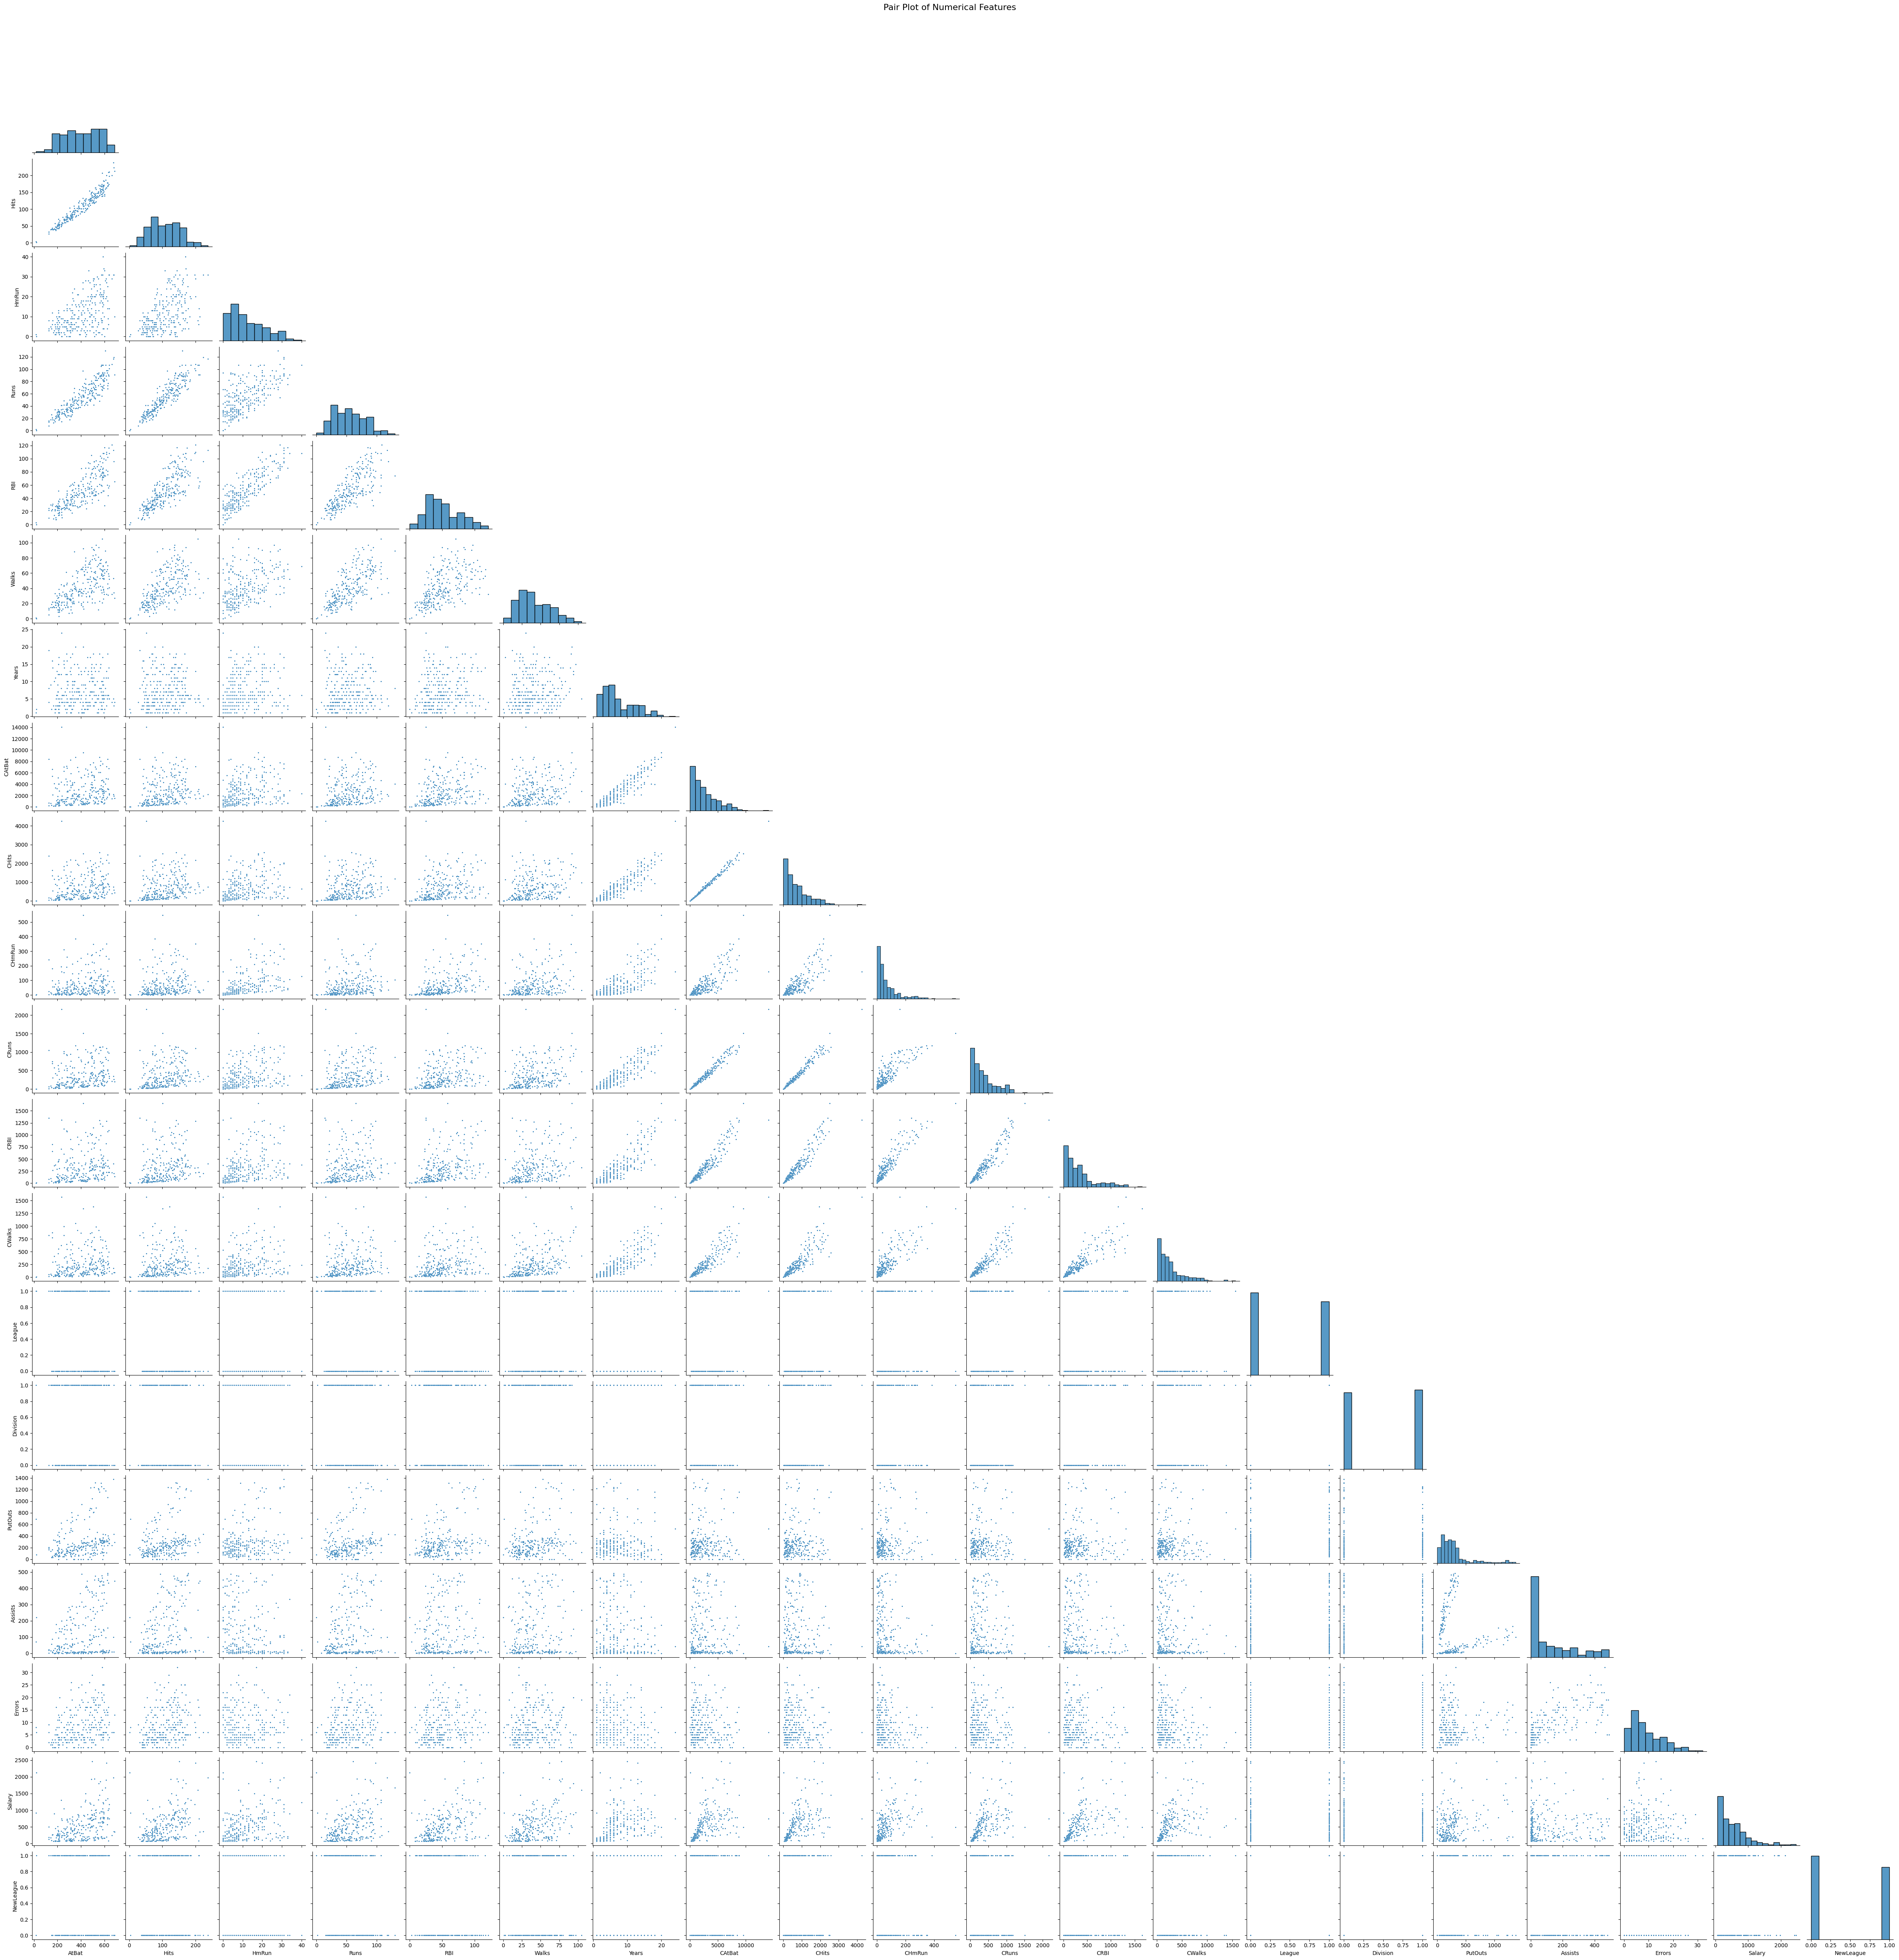

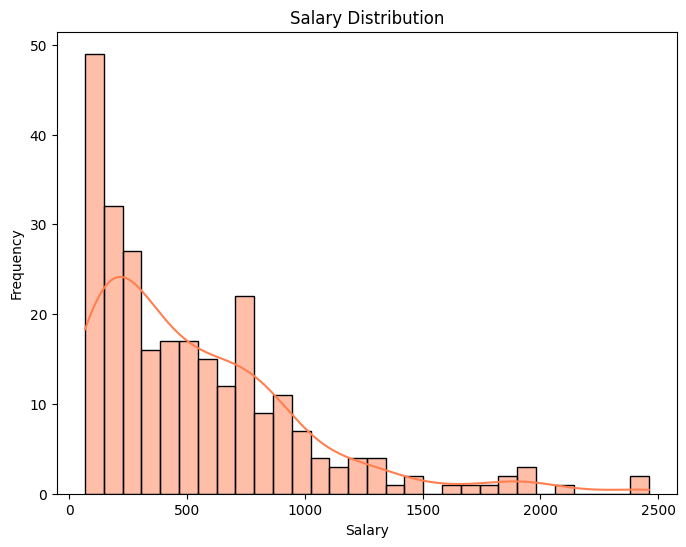

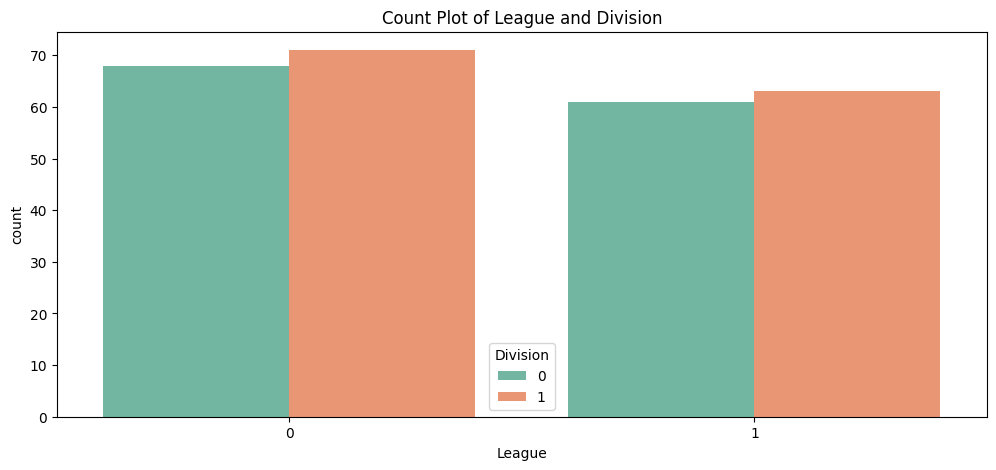


Data Analysis Completed!


In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import pearsonr

# Load the dataset
file_path = 'Hitters.csv'  # Update with your file path if needed
hitters_data = pd.read_csv(file_path)
print("Dataset Loaded Successfully!")

# Display basic dataset information
print("\nDataset Dimensions:", hitters_data.shape)
print("\nDataset Columns:", hitters_data.columns.tolist())
print("\nFirst Few Rows:\n", hitters_data.head())
print("\nData Summary:\n", hitters_data.describe())
print("\nData Information:\n")
hitters_data.info()

# Check for missing values
print("\nMissing Values in Each Column:\n", hitters_data.isnull().sum())

# Data Cleaning - Drop rows with missing values
hitters_data.dropna(inplace=True)
print("\nAfter Dropping Missing Values:\n", hitters_data.info())

# Convert categorical columns to numeric (League, Division, NewLeague)
cat_cols = ['League', 'Division', 'NewLeague']
le = LabelEncoder()
for col in cat_cols:
    hitters_data[col] = le.fit_transform(hitters_data[col])

# Univariate Analysis
# Histograms for numerical columns
num_features = hitters_data.select_dtypes(include=['int64', 'float64']).columns
hitters_data[num_features].hist(figsize=(15, 12), bins=20)
plt.suptitle("Univariate Analysis - Feature Distributions", fontsize=16)
plt.show()

# Boxplots for detecting outliers - Adjusted grid size
plt.figure(figsize=(18, 14))
for i, col in enumerate(num_features, 1):
    plt.subplot(5, 4, i)  # Adjusted to 5x4 grid
    sns.boxplot(y=hitters_data[col], color="skyblue")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

# Count plots for categorical features
plt.figure(figsize=(15, 5))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(hue=hitters_data[col], x=hitters_data[col], palette="viridis", legend=False)
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()

# Bivariate Analysis
# Relationship between Salary and other numerical features
plt.figure(figsize=(18, 14))
for i, col in enumerate(num_features, 1):
    plt.subplot(5, 4, i)  # Adjusted to 5x4 grid
    sns.scatterplot(x=hitters_data[col], y=hitters_data['Salary'], color="orange")
    plt.title(f"{col} vs Salary")
plt.tight_layout()
plt.show()

# Box plots to analyze categorical features against Salary
plt.figure(figsize=(15, 5))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=hitters_data[col], y=hitters_data['Salary'], hue=hitters_data[col], palette="coolwarm", legend=False)
    plt.title(f"{col} vs Salary")
plt.tight_layout()
plt.show()

# Correlation Analysis (Multivariate)
# Correlation heatmap for numerical columns
plt.figure(figsize=(12, 10))
corr_matrix = hitters_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

# Pearson correlation values between Salary and other numerical features
print("\nPearson Correlation with Salary:")
for col in num_features:
    if col != 'Salary':
        corr, _ = pearsonr(hitters_data[col], hitters_data['Salary'])
        print(f"{col}: {corr:.2f}")

# Pair plot for all numeric features with Salary
sns.pairplot(hitters_data[num_features], corner=True, plot_kws={"s": 5})
plt.suptitle("Pair Plot of Numerical Features", y=1.02, fontsize=16)
plt.show()

# Additional Analysis: Salary distribution
plt.figure(figsize=(8, 6))
sns.histplot(hitters_data['Salary'], bins=30, kde=True, color="coral")
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

# Count plot for League and Division to explore relationships
plt.figure(figsize=(12, 5))
sns.countplot(data=hitters_data, x='League', hue='Division', palette="Set2")
plt.title("Count Plot of League and Division")
plt.show()

print("\nData Analysis Completed!")
